In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
import time
import random
import operator
import pickle

In [2]:
df = pd.read_csv('flightlist-november.csv') 

print(df)

        callsign number  icao24 registration typecode origin destination  \
0        TUP6928    NaN  424450          NaN      NaN    NaN        UUWW   
1         CSN399  CZ399  781795          NaN      NaN   YMML        KJFK   
2         ETH714    NaN  040101       ET-ASG     B788   KEWR        ESSA   
3          ZSALT    NaN  008142       ZS-ALT     B190    NaN        YPPH   
4         IRM112  W5112  7335a1       EP-MMA     A343   WMKK        LTBW   
...          ...    ...     ...          ...      ...    ...         ...   
1825010   NKS236  NK236  ac97e1       N910NK      NaN    NaN        KFLL   
1825011    AM333    NaN  7c6a57       VH-VAH     BE20   YMAV        YMEN   
1825012   N404AM    NaN  a4bb89       N404AM     B407    NaN        1IL4   
1825013   N383AK    NaN  a46679       N383AK      NaN   PAMR        PAMR   
1825014   EJA426  1I426  a51358       N426QS     GLF4   KALN        KSUS   

                         firstseen                   lastseen  \
0        2020-10-31 01

In [3]:
dfs = df

In [4]:
dfs = dfs.drop(['number', 'icao24', 'altitude_1', 'altitude_2'], axis=1)

In [5]:
dfs = dfs.dropna(subset=['registration', 'typecode', 'origin', 'destination', 'latitude_2', 'longitude_2'])

In [6]:
dfs = dfs[dfs["callsign"].str[:3]=="SIA"]

In [7]:
dfs.head()

,callsign,registration,typecode,origin,destination,firstseen,lastseen,day,latitude_1,longitude_1,latitude_2,longitude_2
34,SIA377,9V-SMG,A359,LIMC,WSSS,2020-10-31 12:31:55+00:00,2020-11-01 00:48:28+00:00,2020-11-01 00:00:00+00:00,45.623749,8.735337,1.308929,103.960644
161,SIA26,9V-SMI,A359,WSSS,EDDF,2020-10-31 16:12:38+00:00,2020-11-01 04:36:47+00:00,2020-11-01 00:00:00+00:00,1.395721,103.997048,50.040572,8.549163
167,SIA324,9V-SMT,A359,WSSS,EHAM,2020-10-31 16:16:27+00:00,2020-11-01 04:55:17+00:00,2020-11-01 00:00:00+00:00,1.389542,103.994720,52.357628,4.711487
171,SIA283,9V-SMD,A359,WSSS,NZAA,2020-10-31 16:18:49+00:00,2020-11-01 01:19:01+00:00,2020-11-01 00:00:00+00:00,1.394240,103.996298,-36.991241,174.861496
267,SIA346,9V-SMH,A359,WSSS,LSZH,2020-10-31 17:42:04+00:00,2020-11-01 06:16:57+00:00,2020-11-01 00:00:00+00:00,1.392471,103.996251,47.478653,8.540771


In [8]:
dfs.registration.unique()
# dfs.origin.unique()

array(['9V-SMG', '9V-SMI', '9V-SMT', '9V-SMD', '9V-SMH', '9V-SFN',
       '9V-SMC', '9V-SFM', '9V-SMS', '9V-SFK', '9V-SML', '9V-SWQ',
       '9V-MGL', '9V-SMF', '9V-SFQ', '9V-SWE', '9V-SFI', '9V-SMO',
       '9V-SFP', '9V-SFO', '9V-SMQ', '9V-SMN', '9V-SMJ', '9V-SMM',
       '9V-SMB', '9V-SMP', '9V-SMA', '9V-SWY', '9V-SWR', '9V-SCB',
       '9V-SWP', '9V-SMK', '9V-MGI', '9V-SMR', '9V-SWM', '9V-SWH',
       '9V-SWO', '9V-MGF', '9V-SWS', '9V-SKU', '9V-SME', '9V-SWK',
       '9V-SWN'], dtype=object)

In [9]:
data = {'airport': [],
        'latitude': [],
        'longitude': []}

airports = pd.DataFrame(data)
print(airports)

Empty DataFrame
Columns: [airport, latitude, longitude]
Index: []


In [10]:
airports_data = dfs.origin.unique()
airports_another_data = dfs.destination.unique()

for i in airports_another_data:
    found = False
    for j in airports_data:
        if i == j:
            found = True
    if found == False:
        airports_data = np.append(airports_data, i)

In [11]:
print(airports_data)

['LIMC' 'WSSS' 'OMSJ' 'EGLL' 'YSSY' 'YMML' 'NZAA' 'KORD' 'WBSB' 'VOMM'
 'KDFW' 'EHAM' 'VHHH' 'EDDF' 'FAOR' 'YBBN' 'PANC' 'EBMB' 'WMKK' 'KLAX'
 'LSZH' 'NZCH' 'VOBL' 'ZUCK' 'VABB' 'LFPG' 'EKCH' 'VIDP' 'FARA' 'EBBR'
 'YPPH' 'LEBL' 'WSAC' 'VGZR' 'YSCB' 'RJAK' 'FAGM' 'LTBW' 'YTWB' 'YRED'
 'TS53' 'YPWH' 'RJAA' 'LTBA' 'FABB' 'VGTJ' '6AK5' 'WIDD']


In [12]:
for i in airports_data:
    if (np.isnan(dfs[dfs["origin"]==i]["latitude_1"].median())):
        latitude = dfs[dfs["destination"]==i]["latitude_2"].median()
        longitude = dfs[dfs["destination"]==i]["longitude_2"].median()
        
    elif (np.isnan(dfs[dfs["destination"]==i]["latitude_2"].median())):
        latitude = dfs[dfs["origin"]==i]["latitude_1"].median()
        longitude = dfs[dfs["origin"]==i]["longitude_1"].median()
        
    else:
        latitude = (dfs[dfs["origin"]==i]["latitude_1"].median() + dfs[dfs["destination"]==i]["latitude_2"].median())/2
        longitude = (dfs[dfs["origin"]==i]["longitude_1"].median() + dfs[dfs["destination"]==i]["longitude_2"].median())/2
        
    airport = {'airport': i, 'latitude': latitude, 'longitude': longitude}
    airports = airports.append(airport, ignore_index=True)

print(airports)

   airport   latitude   longitude
0     LIMC  45.622997    8.729880
1     WSSS   1.349354  103.991831
2     OMSJ  25.333187   55.513881
3     EGLL  51.464928   -0.451351
4     YSSY -33.937398  151.173686
5     YMML -37.659397  144.836085
6     NZAA -37.007307  174.802684
7     KORD  41.967407  -87.905482
8     WBSB   4.943314  114.927863
9     VOMM  12.988395   80.164536
10    KDFW  32.904827  -97.050797
11    EHAM  52.329506    4.733640
12    VHHH  22.306459  113.907723
13    EDDF  50.045047    8.569396
14    FAOR -26.110302   28.248013
15    YBBN -27.383320  153.122108
16    PANC  61.179126 -150.017751
17    EBMB  50.909637    4.492666
18    WMKK   2.714566  101.717297
19    KLAX  33.936884 -118.397799
20    LSZH  47.467043    8.551562
21    NZCH -43.486825  172.534596
22    VOBL  13.189594   77.703107
23    ZUCK  29.778076  106.693145
24    VABB  19.088734   72.868544
25    LFPG  48.996591    2.563600
26    EKCH  55.612789   12.641687
27    VIDP  28.559853   77.113512
28    FARA -26

In [13]:
e_asia = ["VOMM", "VHHH", "VOBL", "ZUCK", "VABB", "VIDP", "VGZR", "RJAK", "RJAA", "VGTJ"]
americas = ["KORD", "KDFW", "PANC", "KLAX", "TS53", "6AK5"]
europe = ["LIMC", "EGLL", "EHAM", "EDDF", "EBMB", "LSZH", "LFPG", "EKCH", "FARA", "EBBR", "LEBL"]
sw_pasific = ["WSSS", "YSSY", "YMML", "NZAA", "WBSB", "YBBN", "WMKK", "NZCH", "YPPH", "WSAC", "YSCB", "YTWB", "YRED", "YPWH", "WIDD"]
w_asia_africa = ["OMSJ", "FAOR", "FAGM", "LTBW", "LTBA", "FABB"]

In [14]:
region = []
load_rate = []
for i in range(len(airports)):
    for j in range(len(e_asia)):
        if(airports["airport"].iloc[i]==e_asia[j]):
            region.append("East Asia")
            load_rate.append(0.128)
            break
    for k in range(len(americas)):
        if(airports["airport"].iloc[i]==americas[k]):
            region.append("Americas")
            load_rate.append(0.113)
            break
    for l in range(len(europe)):
        if(airports["airport"].iloc[i]==europe[l]):
            region.append("Europe")
            load_rate.append(0.133)
            break
    for m in range(len(sw_pasific)):
        if(airports["airport"].iloc[i]==sw_pasific[m]):
            region.append("South West Pacific")
            load_rate.append(0.171)
            break
    for n in range(len(w_asia_africa)):
        if(airports["airport"].iloc[i]==w_asia_africa[n]):
            region.append("West Asia and Africa")
            load_rate.append(0.140)
            break
            
print(region)

['Europe', 'South West Pacific', 'West Asia and Africa', 'Europe', 'South West Pacific', 'South West Pacific', 'South West Pacific', 'Americas', 'South West Pacific', 'East Asia', 'Americas', 'Europe', 'East Asia', 'Europe', 'West Asia and Africa', 'South West Pacific', 'Americas', 'Europe', 'South West Pacific', 'Americas', 'Europe', 'South West Pacific', 'East Asia', 'East Asia', 'East Asia', 'Europe', 'Europe', 'East Asia', 'Europe', 'Europe', 'South West Pacific', 'Europe', 'South West Pacific', 'East Asia', 'South West Pacific', 'East Asia', 'West Asia and Africa', 'West Asia and Africa', 'South West Pacific', 'South West Pacific', 'Americas', 'South West Pacific', 'East Asia', 'West Asia and Africa', 'West Asia and Africa', 'East Asia', 'Americas', 'South West Pacific']


In [15]:
airports['region'] = region
airports['load_rate'] = load_rate
print(airports)

   airport   latitude   longitude                region  load_rate
0     LIMC  45.622997    8.729880                Europe      0.133
1     WSSS   1.349354  103.991831    South West Pacific      0.171
2     OMSJ  25.333187   55.513881  West Asia and Africa      0.140
3     EGLL  51.464928   -0.451351                Europe      0.133
4     YSSY -33.937398  151.173686    South West Pacific      0.171
5     YMML -37.659397  144.836085    South West Pacific      0.171
6     NZAA -37.007307  174.802684    South West Pacific      0.171
7     KORD  41.967407  -87.905482              Americas      0.113
8     WBSB   4.943314  114.927863    South West Pacific      0.171
9     VOMM  12.988395   80.164536             East Asia      0.128
10    KDFW  32.904827  -97.050797              Americas      0.113
11    EHAM  52.329506    4.733640                Europe      0.133
12    VHHH  22.306459  113.907723             East Asia      0.128
13    EDDF  50.045047    8.569396                Europe      0

In [16]:
from math import radians, cos, sin, asin, sqrt

def haversine(lat1, lon1, lat2, lon2):

      R = 6378.1 #earth radius in km

      dLat = radians(lat2 - lat1)
      dLon = radians(lon2 - lon1)
      lat1 = radians(lat1)
      lat2 = radians(lat2)

      a = sin(dLat/2)**2 + cos(lat1)*cos(lat2)*sin(dLon/2)**2
      c = 2*asin(sqrt(a))

      return R * c

In [17]:
airport_dist = []

# print(len(airports))
# print(airports["latitude"].iloc[1])
for i in range(len(airports)):
    row = []
    for j in range(len(airports)):
        dist = haversine(airports["latitude"].iloc[i], airports["longitude"].iloc[i], airports["latitude"].iloc[j], airports["longitude"].iloc[j])
        row.append(dist)
    airport_dist.append(row)
    
print(airport_dist)
    

[[0.0, 10320.430258215578, 4717.841781312695, 937.1660268519785, 16609.560128529316, 16328.954466590929, 18532.59680591183, 7269.067818856925, 10868.089507810684, 7548.95074633125, 8547.656137571441, 801.3169185796232, 9367.722728633229, 492.40317589072635, 8226.20896899483, 16305.37145127493, 7994.969157835845, 666.7552359065804, 10035.00646673157, 9707.300556374426, 205.7303869886589, 18733.26757149964, 7342.358008596109, 8269.138067898637, 6515.603799301376, 597.7053144643955, 1145.392331724757, 6165.855188281992, 8219.648382286154, 665.8771017492281, 13763.71195323607, 714.7633108335267, 10321.464585191243, 7525.8491042544, 16538.803322184736, 9739.086961262197, 8236.528918768698, 1684.8073009086406, 16240.840339895418, 16299.853550010886, 8549.282279244859, 16231.958278267468, 9772.276447147076, 1706.5289191728648, 8237.618885773374, 7530.724450895547, 7997.137643355394, 10343.682712043537], [10320.430258215578, 0.0, 5841.7632385838115, 10894.76051264912, 6299.836779033911, 6038.4

In [18]:
dfs['day'].value_counts()

2020-11-28 00:00:00+00:00    40
2020-11-15 00:00:00+00:00    38
2020-11-25 00:00:00+00:00    38
2020-11-22 00:00:00+00:00    37
2020-11-21 00:00:00+00:00    37
2020-11-16 00:00:00+00:00    37
2020-11-18 00:00:00+00:00    37
2020-11-29 00:00:00+00:00    37
2020-11-20 00:00:00+00:00    36
2020-11-23 00:00:00+00:00    36
2020-11-14 00:00:00+00:00    35
2020-11-09 00:00:00+00:00    35
2020-11-04 00:00:00+00:00    35
2020-11-11 00:00:00+00:00    34
2020-11-30 00:00:00+00:00    34
2020-11-13 00:00:00+00:00    34
2020-11-01 00:00:00+00:00    34
2020-11-19 00:00:00+00:00    34
2020-11-27 00:00:00+00:00    33
2020-11-08 00:00:00+00:00    33
2020-11-02 00:00:00+00:00    33
2020-11-07 00:00:00+00:00    33
2020-11-26 00:00:00+00:00    33
2020-11-12 00:00:00+00:00    32
2020-11-05 00:00:00+00:00    32
2020-11-06 00:00:00+00:00    32
2020-11-17 00:00:00+00:00    30
2020-11-10 00:00:00+00:00    28
2020-11-03 00:00:00+00:00    27
2020-11-24 00:00:00+00:00    26
Name: day, dtype: int64

In [19]:
# dfs[dfs["day"].isin({day, day_after})]

In [20]:
day = "2020-11-21 00:00:00+00:00"
# day_after = "2020-11-30 00:00:00+00:00"
day_after = "2020-11-25 00:00:00+00:00"
day_before = "2020-11-20 00:00:00+00:00"
dfx = dfs[dfs["day"]==day]
# dfx = dfs[dfs["day"].isin({day, day_after})]
# dfx = dfs[dfs["day"].isin({day, day_after})]
# dfx = dfs[(dfs["day"] >= day) & (dfs["day"] <= day_after)]
dfy = dfs[dfs["day"]<day]

In [21]:
data = {'airplane': [],
        'type': [],
        'curr_loc': [],
        'last_seen': [],
        'capacity': []}

airplanes = pd.DataFrame(data)
print(airplanes)

Empty DataFrame
Columns: [airplane, type, curr_loc, last_seen, capacity]
Index: []


In [22]:
airplanes_data = dfs.registration.unique()
print(airplanes_data)

['9V-SMG' '9V-SMI' '9V-SMT' '9V-SMD' '9V-SMH' '9V-SFN' '9V-SMC' '9V-SFM'
 '9V-SMS' '9V-SFK' '9V-SML' '9V-SWQ' '9V-MGL' '9V-SMF' '9V-SFQ' '9V-SWE'
 '9V-SFI' '9V-SMO' '9V-SFP' '9V-SFO' '9V-SMQ' '9V-SMN' '9V-SMJ' '9V-SMM'
 '9V-SMB' '9V-SMP' '9V-SMA' '9V-SWY' '9V-SWR' '9V-SCB' '9V-SWP' '9V-SMK'
 '9V-MGI' '9V-SMR' '9V-SWM' '9V-SWH' '9V-SWO' '9V-MGF' '9V-SWS' '9V-SKU'
 '9V-SME' '9V-SWK' '9V-SWN']


In [23]:
airplanes_capacity = []
for i in range(len(airplanes_data)):
    for j in range(len(dfs)):
        if(dfs["registration"].iloc[j]==airplanes_data[i]):
            if(dfs["typecode"].iloc[j]=="A359"):
                capacity = 350
            elif(dfs["typecode"].iloc[j]=="B744"):
                capacity = 416
            elif(dfs["typecode"].iloc[j]=="B77W"):
                capacity = 264
            elif(dfs["typecode"].iloc[j]=="B738"):
                capacity = 215
            elif(dfs["typecode"].iloc[j]=="B78X"):
                capacity = 337
            elif(dfs["typecode"].iloc[j]=="A388"):
                capacity = 471
            airplanes_capacity.append(int(capacity))
            break

print(airplanes_capacity)

[350, 350, 350, 350, 350, 416, 350, 416, 350, 416, 350, 264, 215, 350, 416, 264, 416, 350, 416, 416, 350, 350, 350, 350, 350, 350, 350, 264, 264, 337, 264, 350, 215, 350, 264, 264, 264, 215, 264, 471, 350, 264, 264]


In [24]:
no_airplane = 0
for i in airplanes_data:
    for j in range(len(dfx)):
        if(dfx["registration"].iloc[j]==i):
            airplane = {'airplane': i,
                        'type': dfx["typecode"].iloc[j],
                        'curr_loc': dfx["origin"].iloc[j],
                        'last_seen': dfx["firstseen"].iloc[j],
                        'capacity': airplanes_capacity[no_airplane]}
            
            airplanes = airplanes.append(airplane, ignore_index=True)
            break
        elif((j==(len(dfx)-1)) and (dfx["registration"].iloc[j]!=i)):
            for k in range(len(dfy)):
                if((k!=0) and (dfy["registration"].iloc[-k]==i)):
                    airplane = {'airplane': i,
                                'type': dfy["typecode"].iloc[-k],
                                'curr_loc': dfy["destination"].iloc[-k],
                                'last_seen': dfy["firstseen"].iloc[-k],
                                'capacity': airplanes_capacity[no_airplane]}
                    
                    airplanes = airplanes.append(airplane, ignore_index=True)
                    break
                elif((k==(len(dfy)-1)) and (dfy["registration"].iloc[-k]!=i)):
                    for l in range(len(dfs)):
                        if((l!=0) and (dfs["registration"].iloc[-l]==i)):
                            airplane = {'airplane': i,
                                        'type': dfs["typecode"].iloc[-l],
                                        'curr_loc': "WSSS",
                                        'last_seen': day_before,
                                        'capacity': airplanes_capacity[no_airplane]}
                            airplanes = airplanes.append(airplane, ignore_index=True)
                            break
                            
    no_airplane = no_airplane + 1
    
print(airplanes)

   airplane  type curr_loc                  last_seen  capacity
0    9V-SMG  A359     LSZH  2020-11-19 17:47:48+00:00     350.0
1    9V-SMI  A359     WSSS  2020-11-20 17:54:12+00:00     350.0
2    9V-SMT  A359     WSSS  2020-11-20 11:11:12+00:00     350.0
3    9V-SMD  A359     NZCH  2020-11-20 22:51:25+00:00     350.0
4    9V-SMH  A359     LFPG  2020-11-21 10:03:18+00:00     350.0
5    9V-SFN  B744     WSSS  2020-11-21 03:07:03+00:00     416.0
6    9V-SMC  A359     WSSS  2020-11-20 02:40:15+00:00     350.0
7    9V-SFM  B744     WSSS  2020-11-20 22:21:21+00:00     416.0
8    9V-SMS  A359     WSSS  2020-11-20 12:00:28+00:00     350.0
9    9V-SFK  B744     WSSS  2020-11-18 20:05:28+00:00     416.0
10   9V-SML  A359     WSSS  2020-11-21 01:12:22+00:00     350.0
11   9V-SWQ  B77W     WSSS  2020-11-18 17:03:08+00:00     264.0
12   9V-MGL  B738     WSSS  2020-11-01 04:23:41+00:00     215.0
13   9V-SMF  A359     LEBL  2020-11-21 09:57:44+00:00     350.0
14   9V-SFQ  B744     KLAX  2020-11-20 2

In [25]:
max_delay = 180 #minute
min_safe = 30 #minute
max_arrival = max_delay - min_safe

def createSchedule():
    created = False
    while(created==False):
        airplanes_temp = airplanes.copy()
        schedule = []
        wakeup = time.time() + 10
        for i in range(len(dfx)):
            flight = [i]

            found = False
            while (found == False):
                id_airplane = random.randint(0, len(airplanes)-1)
                if (pd.to_datetime(airplanes_temp["last_seen"].iloc[id_airplane]) < (pd.to_datetime(dfx["firstseen"].iloc[i])+ datetime.timedelta(minutes=max_arrival)) and airplanes_temp["curr_loc"].iloc[id_airplane]==dfx["origin"].iloc[i]):
                    found = True
                else:
                    if (time.time() > wakeup):
                        break       

            airplanes_temp["curr_loc"].iloc[id_airplane]=dfx["destination"].iloc[i]

            if (pd.to_datetime(airplanes_temp["last_seen"].iloc[id_airplane]) < (pd.to_datetime(dfx["firstseen"].iloc[i]) - datetime.timedelta(minutes=min_safe))):
                departure = pd.to_datetime(dfx["firstseen"].iloc[i])
                arrival = departure + (pd.to_datetime(dfx["lastseen"].iloc[i])-pd.to_datetime(dfx["firstseen"].iloc[i]))
                airplanes_temp["last_seen"].iloc[id_airplane]=arrival
            else:
                departure = pd.to_datetime(airplanes_temp["last_seen"].iloc[id_airplane]) + datetime.timedelta(minutes=min_safe)
                arrival = departure + (pd.to_datetime(dfx["lastseen"].iloc[i])-pd.to_datetime(dfx["firstseen"].iloc[i]))
                airplanes_temp["last_seen"].iloc[id_airplane]=arrival

            for j in range(len(airports)):
                if(airports["airport"].iloc[j]==dfx["destination"].iloc[i]):
                    load_rate = airports["load_rate"].iloc[j]
                    break     

            passenger = round(airplanes_temp["capacity"].iloc[id_airplane] * load_rate)

            flight.extend([id_airplane, departure, arrival, passenger, load_rate])
            schedule.append(flight)
        if(len(dfx)==len(schedule)):
            created = True
    
    return schedule

In [26]:
def createOriginalSchedule():
    schedule = []
    for i in range(len(dfx)):
        flight=[i]
        for j in range(len(airplanes)):
            if(airplanes["airplane"].iloc[j]==dfx["registration"].iloc[i]):
                break
        flight.append(j)
        flight.append(pd.to_datetime(dfx["firstseen"].iloc[i]))
        flight.append(pd.to_datetime(dfx["lastseen"].iloc[i]))
        for k in range(len(airports)):
            if(airports["airport"].iloc[k]==dfx["destination"].iloc[i]):
                break
        flight.append(round(airplanes["capacity"].iloc[j] * airports["load_rate"].iloc[k]))
        flight.append(airports["load_rate"].iloc[k])
        
        schedule.append(flight)
        
    return schedule
        

In [27]:
# normalisasi passengger & cost
# cost = fixed cost & minute cost
def countOriginalFitness(schedule):
    fitness = []
    cost = 0
    passenger = 0
    plane_count = 0
    for i in range(len(schedule)):
        if(airplanes["type"].iloc[schedule[i][1]]=="A359"):
            min_cost = 244
        elif(airplanes["type"].iloc[schedule[i][1]]=="B744"):
            min_cost = 321
        elif(airplanes["type"].iloc[schedule[i][1]]=="B77W"):
            min_cost = 194
        elif(airplanes["type"].iloc[schedule[i][1]]=="B738"):
            min_cost = 116
        elif(airplanes["type"].iloc[schedule[i][1]]=="B78X"):
            min_cost = 187
        elif(airplanes["type"].iloc[schedule[i][1]]=="A388"):
            min_cost = 433
        cost = cost + round((schedule[i][3]-schedule[i][2]).seconds/60)*min_cost
        passenger = passenger + schedule[i][4]
        
        for k in range(len(airports)):
            if(airports["airport"].iloc[k]==dfx["origin"].iloc[i]):
                origin_id = k
            if(airports["airport"].iloc[k]==dfx["destination"].iloc[i]):
                destination_id = k
        
        cost = cost + airport_dist[origin_id][destination_id]
        
    for j in range(len(airplanes)):
        plane_used = False
        idle_sec = 0
        fixed_cost = 0
        first_flight = pd.to_datetime(airplanes["last_seen"].iloc[j])
        last_flight = pd.to_datetime(dfx["lastseen"].iloc[len(dfx)-1])
        
        for k in range(len(schedule)):
            if(schedule[k][1]==j):
                if(plane_used==False):
                    plane_used = True
                    plane_count = plane_count + 1
                    lastflight_pos = k
                    idle_sec = idle_sec + (schedule[k][2] - first_flight).seconds
                else:
                    idle_sec = idle_sec + (schedule[k][2] - schedule[lastflight_pos][2]).seconds
                    lastflight_pos = k
                    
        if(plane_used==False):
            idle_sec = idle_sec + (last_flight - first_flight).seconds
            fixed_cost = 0
        else:
            idle_sec = idle_sec + (last_flight - schedule[lastflight_pos][3]).seconds
            if(airplanes["type"].iloc[j]=="A359"):
                fixed_cost = 946069
            elif(airplanes["type"].iloc[j]=="B744"):
                fixed_cost = 851244
            elif(airplanes["type"].iloc[j]=="B77W"):
                fixed_cost = 969244
            elif(airplanes["type"].iloc[j]=="B738"):
                fixed_cost = 732745
            elif(airplanes["type"].iloc[j]=="B78X"):
                fixed_cost = 1001250
            elif(airplanes["type"].iloc[j]=="A388"):
                fixed_cost = 638418
        
        if(airplanes["type"].iloc[j]=="A359"):
            idle_min_cost = 195
        elif(airplanes["type"].iloc[j]=="B744"):
            idle_min_cost = 257
        elif(airplanes["type"].iloc[j]=="B77W"):
            idle_min_cost = 155
        elif(airplanes["type"].iloc[j]=="B738"):
            idle_min_cost = 92
        elif(airplanes["type"].iloc[j]=="B78X"):
            idle_min_cost = 150
        elif(airplanes["type"].iloc[j]=="A388"):
            idle_min_cost = 347
        
        cost = cost + round(idle_sec/60)*idle_min_cost
        cost = cost + fixed_cost
#     
#     fitness_val = (((passenger-0)/(4270-0)*1000)-((cost-0)/(50898241-0)*1000))
    fitness_val = cost-passenger
    fitness.append(fitness_val)
    fitness.append(passenger)
    fitness.append(cost)
    fitness.append(plane_count)
    
    return fitness

In [28]:
# normalisasi passengger & cost
# cost = fixed cost & minute cost
def countAirplaneFitness(schedule, airplane_id):
    fitness = []
    cost = 0
    passenger = 0
    plane_used = False
    idle_sec = 0
    idle_min_cost = 0
    fixed_cost = 0
    id = airplane_id
    for i in range(len(schedule)):
        if(schedule[i][1]==id):
            if(airplanes["type"].iloc[id]=="A359"):
                min_cost = 244
            elif(airplanes["type"].iloc[id]=="B744"):
                min_cost = 321
            elif(airplanes["type"].iloc[id]=="B77W"):
                min_cost = 194
            elif(airplanes["type"].iloc[id]=="B738"):
                min_cost = 116
            elif(airplanes["type"].iloc[id]=="B78X"):
                min_cost = 187
            elif(airplanes["type"].iloc[id]=="A388"):
                min_cost = 433
            cost = cost + round((schedule[i][3]-schedule[i][2]).seconds/60)*min_cost
            passenger = passenger + schedule[i][4]
            
            for k in range(len(airports)):
                if(airports["airport"].iloc[k]==dfx["origin"].iloc[i]):
                    origin_id = k
                if(airports["airport"].iloc[k]==dfx["destination"].iloc[i]):
                    destination_id = k

            cost = cost + airport_dist[origin_id][destination_id]
        
    first_flight = pd.to_datetime(airplanes["last_seen"].iloc[id])
    last_flight = pd.to_datetime(dfx["lastseen"].iloc[len(dfx)-1])

    for k in range(len(schedule)):
        if(schedule[k][1]==id):
            if(plane_used==False):
                plane_used = True
                lastflight_pos = k
                idle_sec = idle_sec + (schedule[k][2] - first_flight).seconds
            else:
                idle_sec = idle_sec + (schedule[k][2] - schedule[lastflight_pos][2]).seconds
                lastflight_pos = k

    if(plane_used==False):
        idle_sec = idle_sec + (last_flight - first_flight).seconds
        fixed_cost = 0
    else:
        idle_sec = idle_sec + (last_flight - schedule[lastflight_pos][3]).seconds
        if(airplanes["type"].iloc[id]=="A359"):
            fixed_cost = 946069
        elif(airplanes["type"].iloc[id]=="B744"):
            fixed_cost = 851244
        elif(airplanes["type"].iloc[id]=="B77W"):
            fixed_cost = 969244
        elif(airplanes["type"].iloc[id]=="B738"):
            fixed_cost = 732745
        elif(airplanes["type"].iloc[id]=="B78X"):
            fixed_cost = 1001250
        elif(airplanes["type"].iloc[id]=="A388"):
            fixed_cost = 638418

    if(airplanes["type"].iloc[id]=="A359"):
        idle_min_cost = 195
    elif(airplanes["type"].iloc[id]=="B744"):
        idle_min_cost = 257
    elif(airplanes["type"].iloc[id]=="B77W"):
        idle_min_cost = 155
    elif(airplanes["type"].iloc[id]=="B738"):
        idle_min_cost = 92
    elif(airplanes["type"].iloc[id]=="B78X"):
        idle_min_cost = 150
    elif(airplanes["type"].iloc[id]=="A388"):
        idle_min_cost = 347

    cost = cost + round(idle_sec/60)*idle_min_cost
    cost = cost + fixed_cost
    
    originalFitness = countOriginalFitness(createOriginalSchedule())
    
    fitness_val = (((passenger-0)/(originalFitness[1]-0)*500)-((cost-0)/(originalFitness[2]-0)*100))
#     fitness_val = cost-passenger
    fitness.append(fitness_val)
    fitness.append(passenger)
    fitness.append(cost)
    
    return fitness

In [29]:
# normalisasi passengger & cost
# cost = fixed cost & minute cost
def countFitness(schedule):
    fitness = []
    cost = 0
    passenger = 0
    plane_count = 0
    for i in range(len(schedule)):
        if(airplanes["type"].iloc[schedule[i][1]]=="A359"):
            min_cost = 244
        elif(airplanes["type"].iloc[schedule[i][1]]=="B744"):
            min_cost = 321
        elif(airplanes["type"].iloc[schedule[i][1]]=="B77W"):
            min_cost = 194
        elif(airplanes["type"].iloc[schedule[i][1]]=="B738"):
            min_cost = 116
        elif(airplanes["type"].iloc[schedule[i][1]]=="B78X"):
            min_cost = 187
        elif(airplanes["type"].iloc[schedule[i][1]]=="A388"):
            min_cost = 433
        cost = cost + round((schedule[i][3]-schedule[i][2]).seconds/60)*min_cost
        passenger = passenger + schedule[i][4]
        
        for k in range(len(airports)):
            if(airports["airport"].iloc[k]==dfx["origin"].iloc[i]):
                origin_id = k
            if(airports["airport"].iloc[k]==dfx["destination"].iloc[i]):
                destination_id = k
        
        cost = cost + airport_dist[origin_id][destination_id]
        
    for j in range(len(airplanes)):
        plane_used = False
        idle_sec = 0
        fixed_cost = 0
        first_flight = pd.to_datetime(airplanes["last_seen"].iloc[j])
        last_flight = pd.to_datetime(dfx["lastseen"].iloc[len(dfx)-1])
        
        for k in range(len(schedule)):
            if(schedule[k][1]==j):
                if(plane_used==False):
                    plane_used = True
                    plane_count = plane_count + 1
                    lastflight_pos = k
                    idle_sec = idle_sec + (schedule[k][2] - first_flight).seconds
                else:
                    idle_sec = idle_sec + (schedule[k][2] - schedule[lastflight_pos][2]).seconds
                    lastflight_pos = k
                    
        if(plane_used==False):
            idle_sec = idle_sec + (last_flight - first_flight).seconds
            fixed_cost = 0
        else:
            idle_sec = idle_sec + (last_flight - schedule[lastflight_pos][3]).seconds
            if(airplanes["type"].iloc[j]=="A359"):
                fixed_cost = 946069
            elif(airplanes["type"].iloc[j]=="B744"):
                fixed_cost = 851244
            elif(airplanes["type"].iloc[j]=="B77W"):
                fixed_cost = 969244
            elif(airplanes["type"].iloc[j]=="B738"):
                fixed_cost = 732745
            elif(airplanes["type"].iloc[j]=="B78X"):
                fixed_cost = 1001250
            elif(airplanes["type"].iloc[j]=="A388"):
                fixed_cost = 638418
        
        if(airplanes["type"].iloc[j]=="A359"):
            idle_min_cost = 195
        elif(airplanes["type"].iloc[j]=="B744"):
            idle_min_cost = 257
        elif(airplanes["type"].iloc[j]=="B77W"):
            idle_min_cost = 155
        elif(airplanes["type"].iloc[j]=="B738"):
            idle_min_cost = 92
        elif(airplanes["type"].iloc[j]=="B78X"):
            idle_min_cost = 150
        elif(airplanes["type"].iloc[j]=="A388"):
            idle_min_cost = 347
        
        cost = cost + round(idle_sec/60)*idle_min_cost
        cost = cost + fixed_cost
        
    originalFitness = countOriginalFitness(createOriginalSchedule())
    
    fitness_val = (((passenger-0)/(originalFitness[1]-0)*500)-((cost-0)/(originalFitness[2]-0)*100))
#     fitness_val = cost-passenger
    fitness.append(fitness_val)
    fitness.append(passenger)
    fitness.append(cost)
    fitness.append(plane_count)
    
    return fitness

In [30]:
test = createSchedule()

print(countFitness(test))

c:\users\user\opencv\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


[359.71380283400885, 1940, 31714572.501371205, 21]


In [31]:
def elite(population):
    curr_elite = 0
    for i in range(len(population)):
        if(population[i][0] > population[curr_elite][0]):
            curr_elite = i
    return curr_elite

In [32]:
def swapPlane(flight1, flight2):
    newflight1 = []
    newflight2 = []
    result = []

#     print(flight1[1])
#     print(flight2[1])
    
    newflight1.append(flight1[0])
    newflight2.append(flight2[0])
    
    newflight1.append(flight2[1])
    newflight2.append(flight1[1])
    
#     print(newflight1[1])
#     print(newflight2[1])
    
    newflight1.append(flight2[2])
    newflight2.append(flight1[2])

    newflight1.append(flight1[2] + (flight2[3] - flight2[2]))
    newflight2.append(flight2[2] + (flight1[3] - flight1[2]))
    
    newflight1.append(round(airplanes["capacity"].iloc[flight1[1]] * flight2[5]))
    newflight2.append(round(airplanes["capacity"].iloc[flight2[1]] * flight1[5]))
    
    newflight1.append(flight1[5])
    newflight2.append(flight2[5])
    
    result = [newflight1, newflight2]
    return result

In [33]:
def roulleteWheel(population):
    sump = 0
    sumpart = 0
    worst = 0
    
    for k in range(len(population)):
#         print("worst", population[worst][0])
        if(population[k][0] < population[worst][0]):
            worst = k 
    
    for i in range(len(population)):
        if(population[worst][0] < 0):
            sump = sump + population[i][0] - population[worst][0]
        else:
            sump = sump + population[i][0]
#         print("sump", sump)
    
    rand = random.uniform(0, sump)
#     print("Random", rand)
    
    for j in range(len(population)):
        if(population[worst][0] < 0):
            sumpart = sumpart + population[j][0] - population[worst][0]
        else:
            sumpart = sumpart + population[j][0]
#         print("sumpart", sumpart)
        if(sumpart > rand):
            break
    
    return j

In [34]:
def randomWalk(ant):
    has_walked = False
    while(has_walked==False):
        pos = []
        checked = [999]
        while True:
            rand1=random.randint(0, len(ant)-1)
            rand2=random.randint(0, len(ant)-1)
            if(rand1 < rand2):
                break
        for i in range(rand1, rand2+1):
            pos.append(ant[i][0])
        pos.reverse()
        position = 0
        for j in range(rand1, rand2+1):
            if (pos[position] not in checked and j!=pos[position]):
                if (ant[j][2] < (ant[pos[position]][2]+ datetime.timedelta(minutes=max_arrival)) and dfx["origin"].iloc[j]==dfx["origin"].iloc[pos[position]]):
                    if (ant[pos[position]][2] < (ant[j][2]+ datetime.timedelta(minutes=max_arrival)) and dfx["origin"].iloc[j]==dfx["origin"].iloc[pos[position]]):
                        
                        flight1 = ant[j]
                        flight2 = ant[pos[position]]
                        
                        result = swapPlane(flight1, flight2)
                        
                        ant[j] = result[0]
                        ant[pos[position]] = result[1]
                    
                        newflight1 = result[0]
                        newflight2 = result[1]
                        
                        ext1 = []
                        ext2 = []
                        for k in range(j, len(ant)-1):
                            if(ant[k][0]!=flight1[0] and ant[k][0]!=flight2[0]):
                                if(flight1[1]==ant[k][1]):
                                    ext1.append(ant[k][0])
                                elif(flight2[1]==ant[k][1]):
                                    ext2.append(ant[k][0])
                        
                        for l in (ext1):
                            newflight = []
                            newflight.append(ant[l][0])
                            newflight.append(newflight1[1])
                            if(pd.to_datetime(dfx["firstseen"].iloc[l]) > newflight1[3] + datetime.timedelta(minutes=min_safe)):
                                newflight.append(pd.to_datetime(dfx["firstseen"].iloc[l]))
                                newflight.append(pd.to_datetime(dfx["lastseen"].iloc[l]))
                            else:
                                newflight.append(newflight1[3] + datetime.timedelta(minutes=min_safe))
                                newflight.append(newflight1[3] + (ant[l][3]-ant[l][2]) + datetime.timedelta(minutes=min_safe))
                            newflight.append(round(airplanes["capacity"].iloc[newflight1[1]] * ant[l][5]))
                            newflight.append(ant[l][5])
                            
                            newflight1 = newflight
                            ant[l] = newflight
                        
                        for m in (ext2):
                            newflight = []
                            newflight.append(ant[m][0])
                            newflight.append(newflight2[1])
                            if(pd.to_datetime(dfx["firstseen"].iloc[m]) > newflight2[3] + datetime.timedelta(minutes=min_safe)):
                                newflight.append(pd.to_datetime(dfx["firstseen"].iloc[m]))
                                newflight.append(pd.to_datetime(dfx["lastseen"].iloc[m]))
                            else:
                                newflight.append(newflight2[3] + datetime.timedelta(minutes=min_safe))
                                newflight.append(newflight2[3] + (ant[m][3]-ant[m][2]) + (ant[m][3]-ant[m][2]) + datetime.timedelta(minutes=min_safe))
                            newflight.append(round(airplanes["capacity"].iloc[newflight2[1]] * ant[m][5]))
                            newflight.append(ant[m][5])
                            
                            newflight2 = newflight
                            ant[m] = newflight    
                        
                        checked.append(j)
                        checked.append(pos[position])
                        has_walked = True
                    else:
                        checked.append(j)
                        checked.append(pos[position])
                else:
                    checked.append(j)
                    checked.append(pos[position])
            elif(j==pos[position]):
                checked.append(j)
                break
                
            position = position+1
    return ant

In [35]:
def randomWalkEffect(antlion, ant):
    max_check = 30
    has_walked = False
    check = 0
    while(has_walked==False and check < max_check):
        check = check +1
        
        while True:
            rand1=random.randint(0, len(antlion)-1)
            rand2=random.randint(0, len(antlion)-1)
            if(rand1 < rand2):
                break
                
        for j in range(rand1, rand2+1):
            if (ant[j][2] < (antlion[j][2]+ datetime.timedelta(minutes=max_arrival)) and ant[j][1]!=antlion[j][1]):
                
                found = False
                for k in range(len(ant)):
                    if (ant[k][1]==antlion[j][1] and ant[k][0] < ant[j][0]):
                        ant_fpos = antlion[k][0]
                        found = True
                    elif (ant[k][0]==ant[j][0] and found==True):
                        break
                    elif (ant[k][1]==antlion[j][1] and ant[k][0] > ant[j][0]):
                        ant_fpos = antlion[k][0]
                        found = True
                        break
                        
                if (found==True and ant[ant_fpos][2] < (ant[j][2]+ datetime.timedelta(minutes=max_arrival)) and dfx["origin"].iloc[j]==dfx["origin"].iloc[ant_fpos]):
                    
                    flight1 = ant[j]
                    flight2 = ant[ant_fpos]
                    
                    result = swapPlane(flight1, flight2)
                    
                    ant[j] = result[0]
                    ant[ant_fpos] = result[1]
                    
                    newflight1 = result[0]
                    newflight2 = result[1]
                    
                    ext1 = []
                    ext2 = []
                    for l in range(j, len(ant)-1):
                        if(ant[l][0]!=flight1[0] and ant[l][0]!=flight2[0]):
                            if(flight1[1]==ant[l][1]):
                                ext1.append(ant[l][0])
                            elif(flight2[1]==ant[l][1]):
                                ext2.append(ant[l][0])
                    
                    for m in (ext1):
                        newflight = []
                        newflight.append(ant[m][0])
                        newflight.append(newflight1[1])
                        if(pd.to_datetime(dfx["firstseen"].iloc[m]) > newflight1[3] + datetime.timedelta(minutes=min_safe)):
                            newflight.append(pd.to_datetime(dfx["firstseen"].iloc[m]))
                            newflight.append(pd.to_datetime(dfx["lastseen"].iloc[m]))
                        else:
                            newflight.append(newflight1[3] + datetime.timedelta(minutes=min_safe))
                            newflight.append(newflight1[3] + (ant[m][3]-ant[m][2]) + datetime.timedelta(minutes=min_safe))
                        newflight.append(round(airplanes["capacity"].iloc[newflight1[1]] * ant[m][5]))
                        newflight.append(ant[m][5])
                        
                        newflight1 = newflight
                        ant[m] = newflight
                        
                    for n in (ext2):
                        newflight = []
                        newflight.append(ant[n][0])
                        newflight.append(newflight2[1])
                        if(pd.to_datetime(dfx["firstseen"].iloc[n]) > newflight2[3] + datetime.timedelta(minutes=min_safe)):
                            newflight.append(pd.to_datetime(dfx["firstseen"].iloc[n]))
                            newflight.append(pd.to_datetime(dfx["firstseen"].iloc[n]))
                        else:
                            newflight.append(newflight2[3] + datetime.timedelta(minutes=min_safe))
                            newflight.append(newflight2[3] + (ant[n][3]-ant[n][2]) + datetime.timedelta(minutes=min_safe))
                        newflight.append(round(airplanes["capacity"].iloc[newflight2[1]] * ant[n][5]))
                        newflight.append(ant[n][5])
                        
                        newflight2 = newflight
                        ant[n] = newflight    
                        
                    has_walked = True
    return ant

In [36]:
def mutation(ant):
    has_walked = False
    while(has_walked==False):
        while True:
            rand1=random.randint(0, len(ant)-1)
            rand2=random.randint(0, len(ant)-1)
            if(rand1 < rand2 and dfx["origin"].iloc[rand1] == dfx["origin"].iloc[rand2]):
                break
        j = rand1
        pos = rand2
        last_pos1 = ant[rand1][0]
        last_pos2 = ant[rand2][0]
        for a in range(len(ant)):
            if(ant[a][1]==ant[j][1] and ant[a][0] < ant[j][0]):
                 last_pos1 = ant[a][0]
            elif(ant[a][0]==ant[j][0]):
                 break
        for b in range(len(ant)):
            if(ant[b][1]==ant[pos][1] and ant[b][0] < ant[pos][0]):
                last_pos2 = ant[b][0]
            elif(ant[b][0]==ant[pos][0]):
                break
                        
        if(last_pos1==ant[j][0]):
            plane_lastseen_time1 = pd.to_datetime(airplanes["last_seen"].iloc[ant[j][1]])
            plane_lastseen_place1 = dfx["origin"].iloc[last_pos1]
        else:
            plane_lastseen_time1 = ant[last_pos1][3]
            plane_lastseen_place1 = dfx["destination"].iloc[last_pos1]
                
        if(last_pos2==ant[pos][0]):
            plane_lastseen_time2 = pd.to_datetime(airplanes["last_seen"].iloc[ant[pos][1]])
            plane_lastseen_place2 = dfx["origin"].iloc[last_pos2]
        else:
            plane_lastseen_time2 = ant[last_pos2][3]
            plane_lastseen_place2 = dfx["destination"].iloc[last_pos2]
                    
        if (plane_lastseen_time1 < (pd.to_datetime(dfx["firstseen"].iloc[pos])+ datetime.timedelta(minutes=max_arrival)) and plane_lastseen_place1==plane_lastseen_place2):
            if (plane_lastseen_time2 < (pd.to_datetime(dfx["firstseen"].iloc[j])+ datetime.timedelta(minutes=max_arrival)) and plane_lastseen_place2==plane_lastseen_place1):
                        
                flight1 = ant[j]
                flight2 = ant[pos]
                        
                result = swapPlane(flight1, flight2)
                        
                ant[j] = result[0]
                ant[pos] = result[1]
                    
                newflight1 = result[0]
                newflight2 = result[1]
                        
                ext1 = []
                ext2 = []
                for k in range(j, len(ant)-1):
                    if(ant[k][0]!=flight1[0] and ant[k][0]!=flight2[0]):
                        if(flight1[1]==ant[k][1]):
                            ext1.append(ant[k][0])
                        elif(flight2[1]==ant[k][1]):
                                    ext2.append(ant[k][0])
                        
                for l in (ext1):
                    newflight = []
                    newflight.append(ant[l][0])
                    newflight.append(newflight1[1])
                    if(pd.to_datetime(dfx["firstseen"].iloc[l]) > newflight1[3] + datetime.timedelta(minutes=min_safe)):
                        newflight.append(pd.to_datetime(dfx["firstseen"].iloc[l]))
                        newflight.append(pd.to_datetime(dfx["lastseen"].iloc[l]))
                    else:
                        newflight.append(newflight1[3] + datetime.timedelta(minutes=min_safe))
                        newflight.append(newflight1[3] + (ant[l][3]-ant[l][2]) + datetime.timedelta(minutes=min_safe))
                    newflight.append(round(airplanes["capacity"].iloc[newflight1[1]] * ant[l][5]))
                    newflight.append(ant[l][5])
                            
                    newflight1 = newflight
                    ant[l] = newflight
                        
                for m in (ext2):
                    newflight = []
                    newflight.append(ant[m][0])
                    newflight.append(newflight2[1])
                    if(pd.to_datetime(dfx["firstseen"].iloc[m]) > newflight2[3] + datetime.timedelta(minutes=min_safe)):
                        newflight.append(pd.to_datetime(dfx["firstseen"].iloc[m]))
                        newflight.append(pd.to_datetime(dfx["lastseen"].iloc[m]))
                    else:
                        newflight.append(newflight2[3] + datetime.timedelta(minutes=min_safe))
                        newflight.append(newflight2[3] + (ant[m][3]-ant[m][2]) + (ant[m][3]-ant[m][2]) + datetime.timedelta(minutes=min_safe))
                    newflight.append(round(airplanes["capacity"].iloc[newflight2[1]] * ant[m][5]))
                    newflight.append(ant[m][5])
                            
                    newflight2 = newflight
                    ant[m] = newflight    
                has_walked = True
    return ant 

In [37]:
def gatherEliteChromosomes(antlions, keeped_antlions):
    eliteAntlions = []
    for i in range(len(antlions)):
        if(i < keeped_antlions and i==0):
            eliteAntlions.append(antlions[i])
        elif(i < keeped_antlions and i!=0):
            for k in range(len(eliteAntlions)):
                if(countFitness(antlions[i]) > countFitness(eliteAntlions[k])):
                    eliteAntlions.insert(k, antlions[i])
                    break
                elif(k==len(eliteAntlions)-1):
                    eliteAntlions.append(antlions[i])
                    break
        else:
            for j in range(len(eliteAntlions)):
                if(countFitness(antlions[i])[0] > countFitness(eliteAntlions[j])[0]):
                    eliteAntlions.insert(j, antlions[i])
                    eliteAntlions.pop()
                    break
#             worst = 0
#             for j in range(len(eliteAntlions)):
#                 if(countFitness(eliteAntlions[j])[0] < countFitness(eliteAntlions[worst])[0]):
#                     worst = j
#             if(countFitness(antlions[i])[0] > countFitness(eliteAntlions[worst])[0]):
#                 eliteAntlions[worst] = antlions[i]
                
    return eliteAntlions

In [38]:
def selectEliteChromosome(antlions):
    best = 0
    for i in range(len(antlions)):
        if(countFitness(antlions[i])[0] > countFitness(antlions[best])[0]):
            best = i
    return antlions[best]

In [39]:
def selectWorstChromosome(antlions):
    worst = 0
    for i in range(len(antlions)):
        if(countFitness(antlions[i])[0] < countFitness(antlions[best])[0]):
            worst = i
    return antlions[worst]

In [40]:
print(dfx)

        callsign registration typecode origin destination  \
1208410   SIA322       9V-SMQ     A359   WSSS        EGLL   
1208521   SIA324       9V-SMM     A359   WSSS        EHAM   
1208877    SIA26       9V-SMB     A359   WSSS        EDDF   
1211170   SIA352       9V-SMN     A359   WSSS        EKCH   
1215881   SIA478       9V-SMA     A359   WSSS        FABB   
1216201   SIA231       9V-SMI     A359   WSSS        YSSY   
1220352  SIA7296       9V-SFP     B744   WSSS        YSSY   
1223142  SIA7951       9V-SFI     B744   EBMB        VABB   
1227439   SIA319       9V-SMP     A359   EGLL        WSSS   
1229204  SIA7321       9V-SFQ     B744   KLAX        EHAM   
1235197  SIA7394       9V-SFM     B744   WSSS        OMSJ   
1237066   SIA298       9V-SMD     A359   NZCH        WSSS   
1244788   SIA308       9V-SML     A359   WSSS        EGLL   
1248094  SIA7294       9V-SFO     B744   WSSS        YMML   
1249343  SIA7980       9V-SFN     B744   WSSS        VHHH   
1250949  SIA7295       9

In [41]:
# biar crossover ama randomwalk lebih sering, 
# data last seen pesawat dicek dipenerbangan terakhirnya kalo ada kalo g ada pake last seen di data pesawat
def crossOver(antlion):
    doneCrossover = False
    crossover_range = 5
    while(doneCrossover==False):
        antlionCopy = antlion[:]
        wakeup = time.time() + 300
        while True:
            condition = []
#             range1 = random.randint(0, len(antlionCopy)-1-crossover_range)
            range1 = random.randint(0, len(antlionCopy)-1)
#             range2 = range1 + crossover_range-1
            range2 = random.randint(0, len(antlionCopy)-1)
            if(range1 < range2 and range1+1!=range2):
                for o in range(range1, range2+1):
                    if(dfx["origin"].iloc[o]!="WSSS"):
                        condition.append(False)
#                         print("False")
                    else:
                        condition.append(True)
#                         print("True")
            else:
                condition.append(False)
            if False not in condition:
                break
            
        print("Range 1", range1)
        print("Range 2", range2)
        print("Eittsssssssss")
        while True:
            cut1 = random.randint(range1, range2)
            cut2 = random.randint(range1, range2)
            if(cut1 < cut2 and cut1+1!=cut2):
                break

        crossover_pos = 0 #random.randint(0, 1)

        if(crossover_pos == 0):
            exc = []
            constructed_position = [antlionCopy[cut1], antlionCopy[cut2]]
            for i in range(range1, range2+1):
                if(i!=cut1 and i!=cut2):
                    constructed_position.append(antlion[i])
            index = 0
            for j in range(range1, range2+1):
#                 print("MASHOOOK")
                condition = []
                last_pos = constructed_position[index][0] # antlionCopy[constructed_position[index]][0]
                print("last_pos", last_pos)
            
                for p in range(len(constructed_position)):
                    if(constructed_position[p][0]==j):
                        index_j = p
                for k in range(len(antlion)):
                    if(antlion[k][1]==constructed_position[index][1] and antlion[k][0] < range1):
                        last_pos = antlion[k][0]
                    elif(antlionCopy[k][0]==constructed_position[index][0]):
                        break
                if(last_pos==constructed_position[index][0]):
                    plane_lastseen_time = pd.to_datetime(airplanes["last_seen"].iloc[constructed_position[index][1]])
                    plane_lastseen_place = dfx["origin"].iloc[last_pos]
                else:
                    plane_lastseen_time = antlion[last_pos][3]
                    plane_lastseen_place = dfx["destination"].iloc[last_pos]
                
#                 plane_lastseen_time = pd.to_datetime(dfx["firstseen"].iloc[last_pos])
#                 plane_lastseen_place = dfx["origin"].iloc[last_pos]
                print("last_pos", last_pos)
                
                print("plane_lastseen_time", plane_lastseen_time)
                print("plane_lastseen_place", plane_lastseen_place)
                if(plane_lastseen_time < (pd.to_datetime(dfx["firstseen"].iloc[j]) + datetime.timedelta(minutes=max_arrival)) and plane_lastseen_place==dfx["origin"].iloc[j]):
                    condition.append(True)
                    print("MASHOOOK")
#                     print(j)
                    print(index)
                    print("Flight", constructed_position[index][0])
                    print("Flight-replaced", constructed_position[index_j][0])
                    print("Plane", constructed_position[index][1])
                    print("Plane-replaced", constructed_position[index_j][1])
                    newflight = []
                    newflight.append(j)
                    newflight.append(constructed_position[index][1])

                    if(plane_lastseen_time > (pd.to_datetime(dfx["firstseen"].iloc[j]) - datetime.timedelta(minutes=min_safe))):
                        departure = plane_lastseen_time + datetime.timedelta(minutes=min_safe)
                    else:
                        departure = pd.to_datetime(dfx["firstseen"].iloc[j])

                    newflight.append(departure)
                    arrival = departure + (constructed_position[index_j][3] - constructed_position[index_j][2])
                    newflight.append(arrival)
                    newflight.append(round(airplanes["capacity"].iloc[constructed_position[index][1]] * constructed_position[index_j][5]))
                    newflight.append(constructed_position[index_j][5])


                    ext = []
                    if(constructed_position[index][0]!=constructed_position[index_j][0]):
                        for l in range(range2, len(antlionCopy)-1):
                            if(antlionCopy[l][0]!=constructed_position[index][0] and antlionCopy[l][0] not in exc):
                                if(constructed_position[index_j][1]==antlionCopy[l][1]):
                                    ext.append(antlionCopy[l][0])
                                    exc.append(antlionCopy[l][0])

                    antlionCopy[j] = newflight
                    print(ext)

                    for m in (ext):
                        new_flight = []
                        new_flight.append(antlionCopy[m][0])
                        new_flight.append(newflight[1])
                        if(pd.to_datetime(dfx["firstseen"].iloc[m]) > newflight[3] + datetime.timedelta(minutes=min_safe)):
                            new_flight.append(pd.to_datetime(dfx["firstseen"].iloc[m]))
                            new_flight.append(pd.to_datetime(dfx["lastseen"].iloc[m]))
                        else:
                            new_flight.append(newflight[3] + datetime.timedelta(minutes=min_safe))
                            new_flight.append(newflight[3] + (antlionCopy[m][3]-antlionCopy[m][2]) + datetime.timedelta(minutes=min_safe))
                        new_flight.append(round(airplanes["capacity"].iloc[newflight[1]] * antlionCopy[m][5]))
                        new_flight.append(antlionCopy[m][5])


                        antlionCopy[m] = new_flight
                        newflight = antlionCopy[m]
                        print(new_flight)
                        
#                     if(j==range2):
#                         doneCrossover = True
                    index = index+1
                    
                else:
                    condition.append(False)
                    index = index+1
                    
        if False not in condition:
            doneCrossover = True
            print("Range 1", range1)
            print("Range 2", range2)
            print("Cut 1", cut1)
            print("Cut 2", cut2)
            print("constructed_position", constructed_position)
            
    return antlionCopy

In [42]:
def crossOvers(parent1, parent2):
    doneCrossover = False
    crossover_range = len(parent1)
    while(doneCrossover==False):
        if(crossover_range > 3):
            crossover_range = crossover_range - 1
#         antlionCopy = antlion[:]
        child1 = parent1[:]
        child2 = parent2[:]
        while True:
            condition = []
#             range1 = random.randint(0, len(antlionCopy)-1-crossover_range)
            range1 = random.randint(0, len(parent1)-1)
            range2 = range1 + crossover_range-1
#             range2 = random.randint(0, len(parent1)-1)
            if(range1 < range2 and range1+1!=range2 and range2 < len(parent1)):
#             if(range1 < range2 and range1+1!=range2):
                condition.append(True)
#                 for o in range(range1, range2+1):
#                     if(dfx["origin"].iloc[o]!="WSSS"):
#                         condition.append(False)
#                     else:
#                         condition.append(True)
            else:
                condition.append(False)
            if False not in condition:
                if(crossover_range > 10):
                    crossover_range = crossover_range - 1
                break
        
        cut = random.randint(range1+1, range2-1)
        cuts = cut
            
#         print("Range 1", range1)
#         print("Range 2", range2)
#         print("Cut", cut)
#         print("Eittsssssssss")
        
        cut1 = parent1[range1:cut] + parent2[cut:range2+1]
        cut2 = parent2[range1:cut] + parent1[cut:range2+1]
        
        exc = []

        condition = []
        for i in range(2):
            if(i==0):
                child = child1
                cut = cut1
            else:
                child = child2
                cut = cut2
                
            index = 0
            for j in range(range1, range2+1):
#                 print("MASHOOOK")
                last_pos = cut[index][0] # antlionCopy[constructed_position[index]][0]
#                 print("last_pos", last_pos)

                index_j = j
                
                for k in range(len(child)):
                    if(child[k][1]==cut[index][1] and child[k][0] < range1):
                        last_pos = child[k][0]
                    elif(child[k][0]==cut[index][0]):
                        break
                        
                if(last_pos==cut[index][0]):
                    plane_lastseen_time = pd.to_datetime(airplanes["last_seen"].iloc[cut[index][1]])
                    plane_lastseen_place = dfx["origin"].iloc[last_pos]
                else:
                    plane_lastseen_time = child[last_pos][3]
                    plane_lastseen_place = dfx["destination"].iloc[last_pos]

    #                 plane_lastseen_time = pd.to_datetime(dfx["firstseen"].iloc[last_pos])
    #                 plane_lastseen_place = dfx["origin"].iloc[last_pos]
#                 print("last_pos", last_pos)

#                 print("plane_lastseen_time", plane_lastseen_time)
#                 print("plane_lastseen_place", plane_lastseen_place)
                if(plane_lastseen_time < (pd.to_datetime(dfx["firstseen"].iloc[j]) + datetime.timedelta(minutes=max_arrival)) and plane_lastseen_place==dfx["origin"].iloc[j]):
                    condition.append(True)
#                     print("MASHOOOK")
    #                     print(j)
#                     print(index)
#                     print("Flight", cut[index][0])
#                     print("Flight-replaced", child[index_j][0])
#                     print("Plane", cut[index][1])
#                     print("Plane-replaced", child[index_j][1])
                    
                    replaced_flight = child[j]
                    
                    newflight = []
                    newflight.append(j)
                    newflight.append(cut[index][1])

                    if(plane_lastseen_time > (pd.to_datetime(dfx["firstseen"].iloc[j]) - datetime.timedelta(minutes=min_safe))):
                        departure = plane_lastseen_time + datetime.timedelta(minutes=min_safe)
                    else:
                        departure = pd.to_datetime(dfx["firstseen"].iloc[j])

                    newflight.append(departure)
                    arrival = departure + (replaced_flight[3] - replaced_flight[2])
                    newflight.append(arrival)
                    newflight.append(round(airplanes["capacity"].iloc[cut[index][1]] * replaced_flight[5]))
                    newflight.append(replaced_flight[5])


                    ext = []
#                     if(constructed_position[index][0]!=constructed_position[index_j][0]):
#                     if(j < cuts):
#                         if(i==0):
#                             parent = parent1[:]
#                         else:
#                             parent = parent2[:]
#                     else:
#                         if(i==0):
#                             parent = parent2[:]
#                         else:
#                             parent = parent1[:]
                    if(i==0):
                        parent = parent1[:]
                    else:
                        parent = parent2[:]
                    
                            
                    for l in range(range2, len(parent)-1):
                        if(parent[l][0]!=cut[index][0] and parent[l][0] not in exc):
                            if(parent[index_j][1]==parent[l][1]):
                                ext.append(parent[l][0])
                                exc.append(parent[l][0])

                    child[j] = newflight
#                     print(ext)

                    for m in (ext):
                        new_flight = []
                        new_flight.append(parent[m][0])
                        new_flight.append(newflight[1])
                        if(pd.to_datetime(dfx["firstseen"].iloc[m]) > newflight[3] + datetime.timedelta(minutes=min_safe)):
                            new_flight.append(pd.to_datetime(dfx["firstseen"].iloc[m]))
                            new_flight.append(pd.to_datetime(dfx["lastseen"].iloc[m]))
                        else:
                            new_flight.append(newflight[3] + datetime.timedelta(minutes=min_safe))
                            new_flight.append(newflight[3] + (parent[m][3]-parent[m][2]) + datetime.timedelta(minutes=min_safe))
                        new_flight.append(round(airplanes["capacity"].iloc[newflight[1]] * parent[m][5]))
                        new_flight.append(parent[m][5])


#                         print(child[m])
                        child[m] = new_flight
                        newflight = child[m]
#                         print(new_flight)

    #                     if(j==range2):
    #                         doneCrossover = True
                    index = index+1

                else:
                    condition.append(False)
                    index = index+1
            if(i==0):
                child1 = child[:]
            else:
                child2 = child[:]
                
        if (False not in condition):
             # and countFitness(parent1)[0]!=countFitness(child1)[0] and countFitness(parent2)[0]!=countFitness(child2)[0]
            doneCrossover = True
#             print("Range 1", range1)
#             print("Range 2", range2)
#             print("Cut", cuts)
#             print("Parent 1", countFitness(parent1))
#             print("Parent 2", countFitness(parent2))
#             print("Child 1", countFitness(child1))
#             print("Child 2", countFitness(child2))
    
    return child1, child2
        
        

In [43]:
test1 = createSchedule()
test2 = createSchedule()

c:\users\user\opencv\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [44]:
ch1, ch2 = crossOvers(test1, test2)

In [45]:
ch1m = mutation(ch1)

In [46]:
def ga():
    print("Starting...")
    population_count = 10
#    keeped_chromosome = 5
    iteration = 100
    y_plot_list = []
    x_plot_list = []
    chromosomes = []
    chromosomes_fitness = []
    elite_solution = []
    
    print("Creating Chromosome...")
#     for j in range(population_count):
# #         print("Creating Antlion...")
#         chromosome = createSchedule()
#         fitness = countFitness(chromosome)
#         chromosomes.append(chromosome)
#         chromosomes_fitness.append(fitness)
    
    with open('solution/solution_1-2', 'rb') as fp:
        read_chromosomes = pickle.load(fp)
    with open('solution/fit_solution_1-2', 'rb') as fp:
        read_chromosomes_fitness = pickle.load(fp)
    chromosomes = read_chromosomes[:]
    chromosomes_fitness = read_chromosomes_fitness[:]
    
    for a in range(iteration):
        if(a > 0):
            chromosomes = eliteChromosomes[:]
            chromosomes_fitness = []
            for i in range(len(chromosomes)):
                fitness = countFitness(chromosomes[i])
                chromosomes_fitness.append(fitness)
        print("Chromosome Crossover...")
#         for k in range(iteration):
        while True:
            parent1 = chromosomes[roulleteWheel(chromosomes_fitness)]
            parent2 = chromosomes[roulleteWheel(chromosomes_fitness)]
#             print("countFitness(parent1)", countFitness(parent1))
#             print("countFitness(parent2)", countFitness(parent2))
            if(countFitness(parent1) != countFitness(parent2)):
                break
#             ant = ants[k]
        child1, child2 = crossOvers(parent1, parent2) 
        
        child1found = False
        child2found = False
        
        print("Chromosome Mutation...")
        if(random.uniform(0, 1) < 0.01):
            child1 = mutation(child1)

        if(random.uniform(0, 1) < 0.01):
            child2 = mutation(child2)
        
        if(a==0):
            eliteChromosomes = gatherEliteChromosomes(chromosomes, population_count)
            eliteChromosome = selectEliteChromosome(eliteChromosomes)
            if(len(elite_solution)==0):
                elite_solution = eliteChromosome[:]
            elif(countFitness(elite_solution)[0] < countFitness(eliteChromosome)[0]):
                elite_solution = eliteChromosome[:]
                
        for b in range(len(eliteChromosomes)):
            if(countFitness(eliteChromosomes[b]) == countFitness(child1)):
                child1found = True
            if(countFitness(eliteChromosomes[b]) == countFitness(child2)):
                child2found = True
                
        if(countFitness(child1) > countFitness(eliteChromosomes[-1]) and child1found != True):
            chromosome = child1
            eliteChromosomes[-1] = child1[:]
        
        if(countFitness(child2) > countFitness(eliteChromosomes[-2]) and child2found != True):
            chromosome = child2
            eliteChromosomes[-2] = child2[:]
            
        if(a > 0):
            eliteChromosomes = gatherEliteChromosomes(eliteChromosomes, population_count)
            eliteChromosome = selectEliteChromosome(eliteChromosomes)
            if(len(elite_solution)==0):
                elite_solution = eliteChromosome[:]
            elif(countFitness(elite_solution)[0] < countFitness(eliteChromosome)[0]):
                elite_solution = eliteChromosome[:]
        
        print("Iterasi ke-", a)
        print("Chromosome Elite: ", countFitness(eliteChromosome))
        
        print("Elite Chromosomes")
        for q in range(len(eliteChromosomes)):
            print("Chromosome: ", countFitness(eliteChromosomes[q]))  
            if(a==0):
                values = [countFitness(eliteChromosomes[q])[0]]
                y_plot_list.append(values)
            else:
                if(countFitness(eliteChromosomes[q])[0] > y_plot_list[q][a-1]):
                    y_plot_list[q].append(countFitness(eliteChromosomes[q])[0])
                else:
                    y_plot_list[q].append(y_plot_list[q][a-1])
        x_plot_list.append(a)
        
    print("Final Elite Antlions")
    for n in range(len(eliteChromosomes)):
        print("Antlion: ", countFitness(eliteChromosomes[n]))
    
    print("Final Elite Antlion")
    print("Antlion: ", countFitness(eliteChromosome))
    
    return elite_solution, x_plot_list, y_plot_list

In [47]:
start_time = time.time()
result, x_plot_list, y_plot_list = ga()
end_time = time.time()

Starting...
Creating Chromosome...
Chromosome Crossover...
Chromosome Mutation...
Iterasi ke- 0
Chromosome Elite:  [376.2023424160503, 2019, 32424912.501371205, 22]
Elite Chromosomes
Chromosome:  [376.2023424160503, 2019, 32424912.501371205, 22]
Chromosome:  [372.8981328451739, 1993, 31520955.501371205, 20]
Chromosome:  [367.90456279784723, 1967, 31150435.501371205, 20]
Chromosome:  [367.29531584101085, 1969, 31492605.501371205, 21]
Chromosome:  [364.5521170508409, 1955, 31310257.501371205, 21]
Chromosome:  [359.56991197249283, 1946, 32209385.501371205, 21]
Chromosome:  [356.28882361212334, 1934, 32346675.501371205, 21]
Chromosome:  [351.54938140812413, 1912, 32195496.501371205, 21]
Chromosome:  [363.5271456048156, 2000, 35004237.501371205, 23]
Chromosome:  [347.93609996329593, 1892, 31838510.50137121, 21]
Chromosome Crossover...
Chromosome Mutation...
Iterasi ke- 1
Chromosome Elite:  [376.2023424160503, 2019, 32424912.501371205, 22]
Elite Chromosomes
Chromosome:  [376.2023424160503, 2

Chromosome:  [372.8981328451739, 1993, 31520955.501371205, 20]
Chromosome:  [369.279576135913, 1996, 32888249.501371205, 22]
Chromosome:  [369.20714916830156, 2030, 35457592.501371205, 24]
Chromosome:  [368.67168433526047, 2005, 33754265.501371205, 22]
Chromosome:  [368.44693356158325, 1998, 33300959.501371205, 23]
Chromosome:  [367.90456279784723, 1967, 31150435.501371205, 20]
Chromosome:  [367.4487947020687, 2031, 36087711.501371205, 25]
Chromosome Crossover...
Chromosome Mutation...
Iterasi ke- 11
Chromosome Elite:  [379.53311769441245, 2021, 31522970.501371205, 21]
Elite Chromosomes
Chromosome:  [379.53311769441245, 2021, 31522970.501371205, 21]
Chromosome:  [376.2023424160503, 2019, 32424912.501371205, 22]
Chromosome:  [375.20420355653573, 2052, 35211664.501371205, 24]
Chromosome:  [372.8981328451739, 1993, 31520955.501371205, 20]
Chromosome:  [372.7639906404429, 2055, 36206881.501371205, 25]
Chromosome:  [369.279576135913, 1996, 32888249.501371205, 22]
Chromosome:  [369.207149168

Chromosome:  [372.7639906404429, 2055, 36206881.501371205, 25]
Chromosome Crossover...
Chromosome Mutation...
Iterasi ke- 21
Chromosome Elite:  [381.91103668068024, 2058, 33543274.501371205, 23]
Elite Chromosomes
Chromosome:  [381.91103668068024, 2058, 33543274.501371205, 23]
Chromosome:  [379.53311769441245, 2021, 31522970.501371205, 21]
Chromosome:  [376.8019702284331, 2034, 33359016.501371205, 23]
Chromosome:  [376.72776891393704, 2067, 35854023.501371205, 25]
Chromosome:  [376.69245212764497, 2046, 34292353.501371205, 24]
Chromosome:  [376.2023424160503, 2019, 32424912.501371205, 22]
Chromosome:  [375.6330051648258, 2043, 34402198.501371205, 23]
Chromosome:  [375.3794113783288, 2045, 34632066.501371205, 23]
Chromosome:  [375.20420355653573, 2052, 35211664.501371205, 24]
Chromosome:  [372.7639906404429, 2055, 36206881.501371205, 25]
Chromosome Crossover...
Chromosome Mutation...
Iterasi ke- 22
Chromosome Elite:  [381.91103668068024, 2058, 33543274.501371205, 23]
Elite Chromosomes
Ch

Chromosome:  [380.4175943356458, 2064, 34464225.501371205, 23]
Chromosome:  [379.6356313907303, 2021, 31490600.501371205, 21]
Chromosome:  [379.53311769441245, 2021, 31522970.501371205, 21]
Chromosome:  [378.9402169970332, 2058, 34481348.501371205, 24]
Chromosome:  [377.5205760495974, 2063, 35304099.501371205, 24]
Chromosome:  [377.45849087195916, 2066, 35548392.501371205, 24]
Chromosome:  [376.8019702284331, 2034, 33359016.501371205, 23]
Chromosome Crossover...
Chromosome Mutation...
Iterasi ke- 32
Chromosome Elite:  [386.6956258515002, 2079, 33605301.501371205, 23]
Elite Chromosomes
Chromosome:  [386.6956258515002, 2079, 33605301.501371205, 23]
Chromosome:  [381.91103668068024, 2058, 33543274.501371205, 23]
Chromosome:  [381.51235808475695, 2088, 35916050.501371205, 25]
Chromosome:  [380.4175943356458, 2064, 34464225.501371205, 23]
Chromosome:  [379.6356313907303, 2021, 31490600.501371205, 21]
Chromosome:  [379.53311769441245, 2021, 31522970.501371205, 21]
Chromosome:  [378.940216997

Chromosome:  [379.53311769441245, 2021, 31522970.501371205, 21]
Chromosome Crossover...
Chromosome Mutation...
Iterasi ke- 42
Chromosome Elite:  [389.0798004247198, 2073, 32403090.501371205, 22]
Elite Chromosomes
Chromosome:  [389.0798004247198, 2073, 32403090.501371205, 22]
Chromosome:  [387.8848365549908, 2073, 32780415.501371205, 22]
Chromosome:  [386.725748863867, 2100, 35168611.501371205, 24]
Chromosome:  [386.6956258515002, 2079, 33605301.501371205, 23]
Chromosome:  [386.27758060292973, 2075, 33437719.501371205, 23]
Chromosome:  [385.20241383628604, 2073, 33627424.501371205, 23]
Chromosome:  [381.91103668068024, 2058, 33543274.501371205, 23]
Chromosome:  [381.51235808475695, 2088, 35916050.501371205, 25]
Chromosome:  [380.8896346894831, 2052, 33416417.501371205, 23]
Chromosome:  [379.53311769441245, 2021, 31522970.501371205, 21]
Chromosome Crossover...
Chromosome Mutation...
Iterasi ke- 43
Chromosome Elite:  [389.0798004247198, 2073, 32403090.501371205, 22]
Elite Chromosomes
Chro

Chromosome:  [387.8848365549908, 2073, 32780415.501371205, 22]
Chromosome:  [386.725748863867, 2100, 35168611.501371205, 24]
Chromosome:  [386.6956258515002, 2079, 33605301.501371205, 23]
Chromosome:  [386.27758060292973, 2075, 33437719.501371205, 23]
Chromosome:  [386.2238158274832, 2079, 33754281.501371205, 23]
Chromosome:  [385.6742238603031, 2073, 33478444.501371205, 23]
Chromosome:  [384.4202205615503, 2042, 31552627.501371205, 21]
Chromosome Crossover...
Chromosome Mutation...
Iterasi ke- 53
Chromosome Elite:  [395.35026236759774, 2124, 34242822.501371205, 23]
Elite Chromosomes
Chromosome:  [395.35026236759774, 2124, 34242822.501371205, 23]
Chromosome:  [389.0798004247198, 2073, 32403090.501371205, 22]
Chromosome:  [388.3487450687365, 2084, 33457789.501371205, 23]
Chromosome:  [387.8848365549908, 2073, 32780415.501371205, 22]
Chromosome:  [386.725748863867, 2100, 35168611.501371205, 24]
Chromosome:  [386.6956258515002, 2079, 33605301.501371205, 23]
Chromosome:  [386.2775806029297

Chromosome:  [386.27758060292973, 2075, 33437719.501371205, 23]
Chromosome Crossover...
Chromosome Mutation...
Iterasi ke- 63
Chromosome Elite:  [395.35026236759774, 2124, 34242822.501371205, 23]
Elite Chromosomes
Chromosome:  [395.35026236759774, 2124, 34242822.501371205, 23]
Chromosome:  [392.76297872138286, 2096, 32962694.501371205, 22]
Chromosome:  [390.00499609287124, 2096, 33833562.501371205, 22]
Chromosome:  [389.0798004247198, 2073, 32403090.501371205, 22]
Chromosome:  [388.3487450687365, 2084, 33457789.501371205, 23]
Chromosome:  [387.8848365549908, 2073, 32780415.501371205, 22]
Chromosome:  [387.31604229707796, 2084, 33783878.501371205, 23]
Chromosome:  [386.725748863867, 2100, 35168611.501371205, 24]
Chromosome:  [386.6956258515002, 2079, 33605301.501371205, 23]
Chromosome:  [386.27758060292973, 2075, 33437719.501371205, 23]
Chromosome Crossover...
Chromosome Mutation...
Iterasi ke- 64
Chromosome Elite:  [395.35026236759774, 2124, 34242822.501371205, 23]
Elite Chromosomes
Ch

Chromosome:  [395.3734132490556, 2110, 33186964.501371205, 22]
Chromosome:  [395.35026236759774, 2124, 34242822.501371205, 23]
Chromosome:  [392.76297872138286, 2096, 32962694.501371205, 22]
Chromosome:  [390.4995424153053, 2086, 32928440.501371205, 22]
Chromosome:  [390.415430910381, 2096, 33703962.501371205, 22]
Chromosome:  [390.14827286106845, 2083, 32814669.501371205, 22]
Chromosome:  [388.04709765306126, 2073, 32729179.501371205, 22]
Chromosome Crossover...
Chromosome Mutation...
Iterasi ke- 74
Chromosome Elite:  [401.4176152374804, 2141, 33600215.501371205, 22]
Elite Chromosomes
Chromosome:  [401.4176152374804, 2141, 33600215.501371205, 22]
Chromosome:  [399.1541789314028, 2131, 33565961.501371205, 22]
Chromosome:  [396.3129010174687, 2118, 33489479.501371205, 22]
Chromosome:  [396.1044686050389, 2099, 32132265.501371205, 21]
Chromosome:  [395.3734132490556, 2110, 33186964.501371205, 22]
Chromosome:  [395.35026236759774, 2124, 34242822.501371205, 23]
Chromosome:  [392.7629787213

Chromosome:  [395.3734132490556, 2110, 33186964.501371205, 22]
Chromosome Crossover...
Chromosome Mutation...
Iterasi ke- 84
Chromosome Elite:  [405.25904961427227, 2158, 33660470.501371205, 22]
Elite Chromosomes
Chromosome:  [405.25904961427227, 2158, 33660470.501371205, 22]
Chromosome:  [401.4176152374804, 2141, 33600215.501371205, 22]
Chromosome:  [400.7410982589143, 2138, 33589145.501371205, 22]
Chromosome:  [399.1541789314028, 2131, 33565961.501371205, 22]
Chromosome:  [398.0804873989407, 2099, 31508312.501371205, 21]
Chromosome:  [397.3494320429574, 2110, 32563011.501371205, 22]
Chromosome:  [396.3129010174687, 2118, 33489479.501371205, 22]
Chromosome:  [396.1044686050389, 2099, 32132265.501371205, 21]
Chromosome:  [395.67840121052166, 2113, 33315349.501371205, 22]
Chromosome:  [395.3734132490556, 2110, 33186964.501371205, 22]
Chromosome Crossover...
Chromosome Mutation...
Iterasi ke- 85
Chromosome Elite:  [405.25904961427227, 2158, 33660470.501371205, 22]
Elite Chromosomes
Chrom

Chromosome:  [402.98639119254204, 2148, 33629128.501371205, 22]
Chromosome:  [401.44718491256594, 2141, 33590878.501371205, 22]
Chromosome:  [401.4176152374804, 2141, 33600215.501371205, 22]
Chromosome:  [400.7410982589143, 2138, 33589145.501371205, 22]
Chromosome:  [399.1541789314028, 2131, 33565961.501371205, 22]
Chromosome:  [398.7789898134723, 2110, 32111610.501371205, 21]
Chromosome:  [398.0804873989407, 2099, 31508312.501371205, 21]
Chromosome Crossover...
Chromosome Mutation...
Iterasi ke- 95
Chromosome Elite:  [406.87553861686945, 2165, 33674317.501371205, 22]
Elite Chromosomes
Chromosome:  [406.87553861686945, 2165, 33674317.501371205, 22]
Chromosome:  [405.31358799168964, 2144, 32594701.501371205, 21]
Chromosome:  [405.25904961427227, 2158, 33660470.501371205, 22]
Chromosome:  [402.98639119254204, 2148, 33629128.501371205, 22]
Chromosome:  [401.44718491256594, 2141, 33590878.501371205, 22]
Chromosome:  [401.4176152374804, 2141, 33600215.501371205, 22]
Chromosome:  [400.741098

In [48]:
print(result)

[[0, 22, Timestamp('2020-11-20 16:06:59+0000', tz='UTC'), Timestamp('2020-11-21 05:40:59+0000', tz='UTC'), 47, 0.133], [1, 2, Timestamp('2020-11-20 16:08:35+0000', tz='UTC'), Timestamp('2020-11-21 05:29:37+0000', tz='UTC'), 47, 0.133], [2, 20, Timestamp('2020-11-20 16:36:59+0000', tz='UTC'), Timestamp('2020-11-21 05:32:57+0000', tz='UTC'), 47, 0.133], [3, 39, Timestamp('2020-11-20 16:44:59+0000', tz='UTC'), Timestamp('2020-11-21 05:14:59+0000', tz='UTC'), 63, 0.133], [4, 9, Timestamp('2020-11-20 17:48:48+0000', tz='UTC'), Timestamp('2020-11-21 03:40:12+0000', tz='UTC'), 58, 0.14], [5, 18, Timestamp('2020-11-20 19:24:04+0000', tz='UTC'), Timestamp('2020-11-21 02:27:31+0000', tz='UTC'), 71, 0.171], [6, 8, Timestamp('2020-11-20 18:54:04+0000', tz='UTC'), Timestamp('2020-11-21 01:49:29+0000', tz='UTC'), 60, 0.171], [7, 16, Timestamp('2020-11-20 20:02:05+0000', tz='UTC'), Timestamp('2020-11-21 04:34:48+0000', tz='UTC'), 53, 0.128], [8, 25, Timestamp('2020-11-20 21:01:38+0000', tz='UTC'), Ti

In [49]:
def printResult(result):
    fitness = countFitness(result)
    originalschedule = createOriginalSchedule()
    original_fitness = countFitness(originalschedule)
    print("------------------------------------------------------------------------------------------------------------------")
    print("Airplane \tPassenger \tCost \t\tRouting")
    print("------------------------------------------------------------------------------------------------------------------")
    for i in range(len(airplanes)):
        flight_list = []
        airplanefitness = countAirplaneFitness(result, i)
        print(airplanes["airplane"].iloc[i], end="\t\t")
        print(airplanefitness[1], end="\t\t")
        print(airplanefitness[2], end="\t\t")
        
        for j in range(len(result)):
            if(result[j][1]==i):
                flight_list.append(result[j])
                
        for k in range(len(flight_list)):
            print("Flight-", flight_list[k][0], end=", ")     
            
        print("\n")
    
    print("------------------------------------------------------------------------------------------------------------------")
    print('Result\t\t%d\t\t%d\t\t%d' % (fitness[1], fitness[2], fitness[3]))
    print("------------------------------------------------------------------------------------------------------------------")
    print('Original\t%d\t\t%d\t\t%d' % (original_fitness[1], original_fitness[2], original_fitness[3]))
    print("------------------------------------------------------------------------------------------------------------------")
    print('Difference\t%d\t\t%d\t\t\t%d' % (fitness[1] - original_fitness[1], original_fitness[2] - fitness[2], original_fitness[3] - fitness[3]))
    print("------------------------------------------------------------------------------------------------------------------")

In [50]:
printResult(result)

------------------------------------------------------------------------------------------------------------------
Airplane 	Passenger 	Cost 		Routing
------------------------------------------------------------------------------------------------------------------
9V-SMG		0		71565		

9V-SMI		0		70200		

9V-SMT		87		1615866.3315325938		Flight- 1, Flight- 31, 

9V-SMD		60		1277652.8373252342		Flight- 11, 

9V-SMH		60		1154031.7855521704		Flight- 23, 

9V-SFN		53		1188156.8002861878		Flight- 29, 

9V-SMC		0		248430		

9V-SFM		113		1417295.7842629524		Flight- 10, Flight- 18, 

9V-SMS		120		1502645.6735580678		Flight- 6, Flight- 16, 

9V-SFK		58		1696748.954912411		Flight- 4, 

9V-SML		60		1236551.0		Flight- 30, 

9V-SWQ		0		63705		

9V-MGL		0		107732		

9V-SMF		47		1113477.7633108336		Flight- 22, 

9V-SFQ		184		1644573.1620065398		Flight- 9, Flight- 20, Flight- 21, 

9V-SWE		0		2945		

9V-SFI		124		1481666.2159677343		Flight- 7, Flight- 17, 

9V-SMO		167		1604060.125624015		Flight- 13, Fl

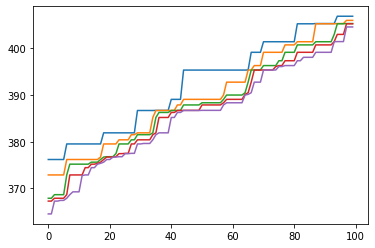

In [51]:
import matplotlib.pyplot as plt
import numpy as np
    
for i in range(5):
    plt.plot(x_plot_list, y_plot_list[i])

plt.show()

In [52]:
print("--- %s seconds ---" % (time.time() - start_time))

--- 6768.090105056763 seconds ---


In [53]:
import pickle

with open('ga_output-2', 'wb') as fp:
    pickle.dump(result, fp)
with open('ga_xplot-2', 'wb') as fp:
    pickle.dump(x_plot_list, fp)
with open('ga_yplot-2', 'wb') as fp:
    pickle.dump(y_plot_list, fp)

In [54]:
with open('ga_output-2', 'rb') as fp:
    read_result = pickle.load(fp)
    
print(read_result)

[[0, 22, Timestamp('2020-11-20 16:06:59+0000', tz='UTC'), Timestamp('2020-11-21 05:40:59+0000', tz='UTC'), 47, 0.133], [1, 2, Timestamp('2020-11-20 16:08:35+0000', tz='UTC'), Timestamp('2020-11-21 05:29:37+0000', tz='UTC'), 47, 0.133], [2, 20, Timestamp('2020-11-20 16:36:59+0000', tz='UTC'), Timestamp('2020-11-21 05:32:57+0000', tz='UTC'), 47, 0.133], [3, 39, Timestamp('2020-11-20 16:44:59+0000', tz='UTC'), Timestamp('2020-11-21 05:14:59+0000', tz='UTC'), 63, 0.133], [4, 9, Timestamp('2020-11-20 17:48:48+0000', tz='UTC'), Timestamp('2020-11-21 03:40:12+0000', tz='UTC'), 58, 0.14], [5, 18, Timestamp('2020-11-20 19:24:04+0000', tz='UTC'), Timestamp('2020-11-21 02:27:31+0000', tz='UTC'), 71, 0.171], [6, 8, Timestamp('2020-11-20 18:54:04+0000', tz='UTC'), Timestamp('2020-11-21 01:49:29+0000', tz='UTC'), 60, 0.171], [7, 16, Timestamp('2020-11-20 20:02:05+0000', tz='UTC'), Timestamp('2020-11-21 04:34:48+0000', tz='UTC'), 53, 0.128], [8, 25, Timestamp('2020-11-20 21:01:38+0000', tz='UTC'), Ti

In [55]:
with open('ga_yplot-2', 'rb') as fp:
    read_yplot = pickle.load(fp)
    
print(read_yplot)

[[376.2023424160503, 376.2023424160503, 376.2023424160503, 376.2023424160503, 376.2023424160503, 376.2023424160503, 379.53311769441245, 379.53311769441245, 379.53311769441245, 379.53311769441245, 379.53311769441245, 379.53311769441245, 379.53311769441245, 379.53311769441245, 379.53311769441245, 379.53311769441245, 379.53311769441245, 379.53311769441245, 381.91103668068024, 381.91103668068024, 381.91103668068024, 381.91103668068024, 381.91103668068024, 381.91103668068024, 381.91103668068024, 381.91103668068024, 381.91103668068024, 381.91103668068024, 381.91103668068024, 386.6956258515002, 386.6956258515002, 386.6956258515002, 386.6956258515002, 386.6956258515002, 386.6956258515002, 386.725748863867, 386.725748863867, 386.725748863867, 386.725748863867, 386.725748863867, 389.0798004247198, 389.0798004247198, 389.0798004247198, 389.0798004247198, 395.35026236759774, 395.35026236759774, 395.35026236759774, 395.35026236759774, 395.35026236759774, 395.35026236759774, 395.35026236759774, 395.